## Roll Length Model
* This notebook is a user interface for a model whose calculations are mostly contained in another code file (roll_model.py) in object-oriented style. The model is validated by a separate test_roll_model.py file containing Pytest tests.
* For a substrate on a roll such as a consumer product like toilet paper or an industrial substrate, this fits experimental length versus diameter data to calculate the substrate's effective caliper while wound on the roll
* Alternatively, if caliper and diameter are known from previous measurements, the model can calculate roll length. This is useful industrially to know how many linear meters remain on a roll and thereby be able to calculate parameters like roll weight and run time as illustrated below.</br></br>
JDL / DataDelve LLC, April 2023; Updated February 2025


In [1]:
import pandas as pd
import sys, os

#Orient the notebook to its location and import Rolllength Class from roll.py
path_libs = os.getcwd() + os.sep + 'libs'
if path_libs not in sys.path: sys.path.append(path_libs)
from roll_model import RollLength

#### How to use the RollLength class
One use case is calculating caliper from measured length versus diameter data. The class contains a Python class `@Property` called `Caliper` to do this. It needs a *.csv file with the measurements as an input

In [3]:
fToiletPaperData = 'cushiony_tp_length_vs_diam.csv'
caliper_value = RollLength(file_raw=fToiletPaperData).Caliper
print(caliper_value)

0.4804


In [4]:
#This does things more step-by-step by first instancing the class and then running the procedure
r = RollLength(file_raw=fToiletPaperData)
r.CaliperFromRawData()

# Once the "procedure" has been run, class attributes are available
print('R^2: ', round(r.R_squared, 4), 'Caliper: ', r.caliper)
print('\n', r.df_raw)

R^2:  0.9985 Caliper:  0.4804

     length  diameter  diam_m  diam_m^2
0    0.000      43.2  0.0432  0.001866
1    0.699      48.7  0.0487  0.002372
2    2.242      55.3  0.0553  0.003058
3    3.766      63.3  0.0633  0.004007
4    5.293      69.3  0.0693  0.004802
5    6.820      75.5  0.0755  0.005700
6    8.347      81.3  0.0813  0.006610
7    9.874      87.0  0.0870  0.007569
8   11.405      91.8  0.0918  0.008427
9   12.935      97.8  0.0978  0.009565
10  14.465     102.3  0.1023  0.010465
11  16.002     106.8  0.1068  0.011406
12  17.545     111.0  0.1110  0.012321
13  19.088     116.5  0.1165  0.013572
14  20.631     120.5  0.1205  0.014520


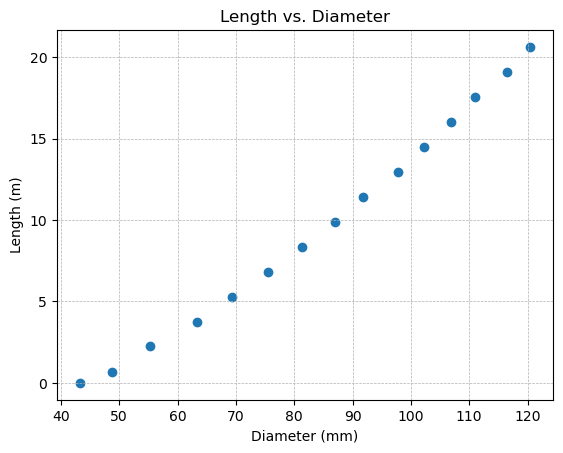

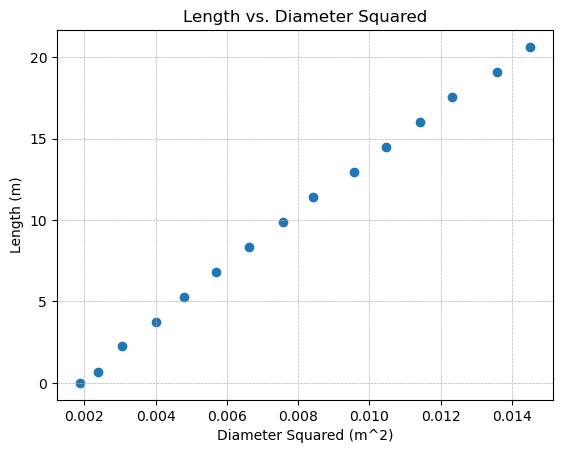

In [5]:
#The class includes a plotting procedure
r.PlotRawAndTransformedData()

### Alternative Usage - Calculate length from diam and caliper

In [6]:
L = RollLength(file_raw=None, diam_roll=1500, diam_core=150, caliper=0.2).Length
print('The length on this large, low-caliper roll is:', L, 'meters')

The length on this large, low-caliper roll is: 8747.4 meters


### Calculate roll weight and plant run time

In [9]:
basis_weight = 50 #grams per square meter
roll_width = 200 #mm
line_speed = 100 #m.min

# Unit Conversions
d_unit_conv = {'mm_m':1000., 'g_kg':1000.}

In [10]:
roll_weight = round(L * (roll_width / d_unit_conv['mm_m']) * (basis_weight / d_unit_conv['g_kg']), 2)
run_time = round(L / line_speed, 1)
print('the roll weighs', roll_weight, 'kg')
print('the roll will run online for', run_time, 'minutes')

the roll weighs 87.47 kg
the roll will run online for 87.5 minutes
